# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [342]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [343]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,Type,Unnamed: 3,Unnamed: 4
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,NaN,NaN
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,NaN,NaN
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,NaN,NaN
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,NaN,NaN
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,NaN,NaN
...,...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,NaN,NaN
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,NaN,NaN
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,NaN,NaN
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,NaN,NaN


## Deliverable 1: Get a Summary DataFrame 

In [344]:
#  1. Get the total rides for each city type
total_rides=pyber_data_df.groupby(["Type"])["ride_id"].count()
total_rides_df=total_rides.to_frame()
total_rides.to_frame()

,ride_id
Type,
Rural,125
Suburban,625
Urban,1625


In [345]:
# 2. Get the total drivers for each city type
total_drivers=city_data_df.groupby(["Type"])["driver_count"].sum()
total_drivers_df=total_drivers.to_frame()
total_drivers_df=total_drivers_df.rename(columns={"driver_count":"Total Drivers"})
total_drivers_df

,Total Drivers
Type,
Rural,78
Suburban,490
Urban,2405


In [346]:
Total_rides_and_drivers_df=pd.merge(total_rides_df,total_drivers_df,how="left",on=["Type"])
Total_rides_and_drivers_df=Total_rides_and_drivers_df.rename(columns={"ride_id":"Total Rides"})
Total_rides_and_drivers_df

,Total Rides,Total Drivers
Type,,
Rural,125,78
Suburban,625,490
Urban,1625,2405


In [347]:
#  3. Get the total amount of fares for each city type
total_fares=pyber_data_df.groupby(["Type"])["fare"].sum()
total_fares_df=total_fares.to_frame()
total_fares_df=total_fares_df.rename(columns={"fare":"Total Fares"})
total_fares_df

,Total Fares
Type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [348]:
All_totals_df=pd.merge(Total_rides_and_drivers_df,total_fares_df,how="left",on=["Type"])
All_totals_df.dtypes

Total Rides        int64
Total Drivers      int64
Total Fares      float64
dtype: object

In [349]:
#  4. Get the average fare per ride for each city type. 
Avg_fare_per_ride=total_fares/total_rides
Avg_fare_per_ride_df=Avg_fare_per_ride_df=Avg_fare_per_ride.to_frame()
Avg_fare_per_ride_df.rename( columns={0 :'Average Fare Per Ride'}, inplace=True )
Avg_fare_per_ride_df

,Average Fare Per Ride
Type,
Rural,34.623440
Suburban,30.970128
Urban,24.525772


In [350]:
# 5. Get the average fare per driver for each city type. 
Avg_fare_per_driver=total_fares/total_drivers
Avg_fare_per_driver_df=Avg_fare_per_driver.to_frame()
Avg_fare_per_driver_df.rename( columns={0 :'Average Fare Per Driver'}, inplace=True )
Avg_fare_per_driver_df

,Average Fare Per Driver
Type,
Rural,55.486282
Suburban,39.502714
Urban,16.571468


In [351]:
Averages_df=pd.merge(Avg_fare_per_ride_df,Avg_fare_per_driver_df,how="left", on="Type")
Averages_df

,Average Fare Per Ride,Average Fare Per Driver
Type,,
Rural,34.623440,55.486282
Suburban,30.970128,39.502714
Urban,24.525772,16.571468


In [352]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.merge(All_totals_df,Averages_df,how="left",on="Type")
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [353]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [354]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare Per Ride      float64
Average Fare Per Driver    float64
dtype: object

In [355]:
#  8. Format the columns.
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare Per Ride"]=pyber_summary_df["Average Fare Per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare Per Driver"]=pyber_summary_df["Average Fare Per Driver"].map("${:.2f}".format)

#### Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [387]:
# 1. Read the merged DataFrame
pyber_summary_df

,level_0,index,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,0,Rural,125,78,$4327.93,$34.62,$55.49
1,1,Suburban,625,490,$19356.33,$30.97,$39.50
2,2,Urban,1625,2405,$39854.38,$24.53,$16.57


In [388]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
Fares_by_date=pyber_data_df.groupby(["Type","date"])["fare"].sum()
Fares_by_date_df=Fares_by_date.to_frame()
Fares_by_date_df

fare
Type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [389]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_summary_df= pyber_summary_df.reset_index()

ValueError: cannot insert level_0, already exists

In [390]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Total_fares_by_city_pivot = pyber_data_df.pivot(index="date", columns="Type", values="fare")
Total_fares_by_city_pivot

Type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [391]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_total_Jan_April_df=Total_fares_by_city_pivot.loc['2019-01-01':'2019-04-29']
fare_total_Jan_April_df

Type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [396]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_total_Jan_April_df.index = pd.to_datetime(fare_total_Jan_April_df.index)
fare_total_Jan_April_df

Type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [397]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_total_Jan_April_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [402]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_sum_df=fare_total_Jan_April_df.resample('W').sum()
weekly_fare_sum_df

Type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


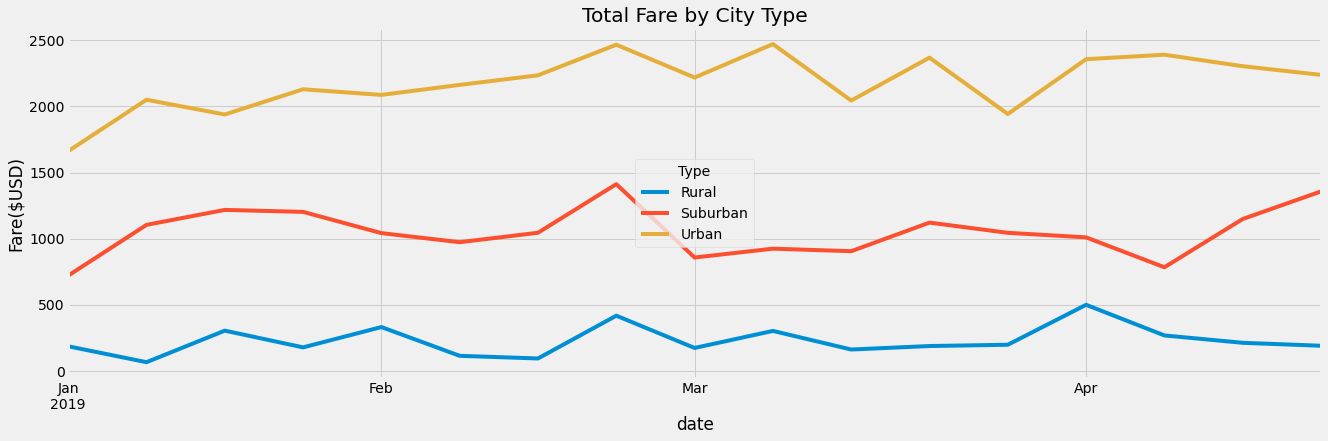

In [405]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fare_sum=weekly_fare_sum_df.plot(figsize = (20,6))
weekly_fare_sum.set_title("Total Fare by City Type")
weekly_fare_sum.set_ylabel("Fare($USD)")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



In [410]:
plt.savefig("Pyber_Fare_Summary.png")

<Figure size 432x288 with 0 Axes>